In [2]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot
from datetime import datetime
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

dow = pd.read_csv("data_gathering/data/DJI.csv")
btc = pd.read_csv("data_gathering/data/BTC.csv")

In [ ]:
from IPython.display import HTML
plotly.tools.set_credentials_file(username="AndyVu-Hoang", api_key="9Ut7brZV1YJ1eDk0aNyw")

In [3]:
dow.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/1/2013,14839.79981,14839.79981,14687.04981,14700.95020,14700.95020,112620000
1,5/2/2013,14700.95020,14834.62988,14700.95020,14831.58008,14831.58008,91180000
2,5/3/2013,14831.58008,15009.58984,14831.58008,14973.95996,14973.95996,119890000
3,5/6/2013,14973.95996,14988.87012,14941.08984,14968.88965,14968.88965,116160000
4,5/7/2013,14968.88965,15056.66992,14968.88965,15056.20020,15056.20020,117230000


In [4]:
btc.tail()

,Date,BITSTAMP,COINBASE,ITBIT,KRAKEN,avg_btc_price_usd,price_usd
2338,2018-02-06,6869.997696,6826.268845,6807.908676,6777.569509,6820.436181,6820.436181
2339,2018-02-07,7986.143931,7935.824943,7925.693199,7904.260245,7937.980580,7937.980580
2340,2018-02-08,8228.030379,8184.579324,8184.496108,8201.635143,8199.685239,8199.685239
2341,2018-02-09,8254.918737,8236.681315,8260.202908,8277.986041,8257.447250,8257.447250
2342,2018-02-10,8664.056401,8639.981944,8709.024654,8626.471370,8659.883592,8659.883592


In [5]:
# the dates are in different formats
# converting to datetime
dow['Date'] = pd.to_datetime(dow['Date'])
btc['Date'] = pd.to_datetime(btc['Date'])

In [6]:
btc_ts = btc[['price_usd']]
btc_ts.index = btc['Date']

In [7]:
btc_ts.index

DatetimeIndex(['2011-09-13', '2011-09-14', '2011-09-15', '2011-09-16',
               '2011-09-17', '2011-09-18', '2011-09-19', '2011-09-20',
               '2011-09-21', '2011-09-22',
               ...
               '2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04',
               '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08',
               '2018-02-09', '2018-02-10'],
              dtype='datetime64[ns]', name='Date', length=2343, freq=None)

In [8]:
btc_ts.price_usd

Date
2011-09-13        5.929231
2011-09-14        5.590798
2011-09-15        5.094272
2011-09-16        4.854515
2011-09-17        4.870000
2011-09-18        4.839576
2011-09-19        4.900000
2011-09-20        5.388054
2011-09-21        5.706075
2011-09-22        5.696960
2011-09-23        5.707099
2011-09-24        5.722494
2011-09-25        6.050000
2011-09-26        5.983073
2011-09-27        4.895402
2011-09-28        4.862498
2011-09-29        4.816345
2011-09-30             NaN
2011-10-01             NaN
2011-10-02             NaN
2011-10-03        4.847772
2011-10-04        4.924737
2011-10-05        5.029419
2011-10-06        4.908846
2011-10-07        4.687629
2011-10-08        4.455536
2011-10-09        3.890000
2011-10-10        4.498302
2011-10-11        3.998965
2011-10-12        3.943964
                  ...     
2018-01-12    13613.176099
2018-01-13    14284.242800
2018-01-14    13634.977441
2018-01-15    13861.606328
2018-01-16    11799.334773
2018-01-17    10525.020

In [9]:
py.iplot([go.Scatter(x=btc_ts.index, y=btc_ts.price_usd)])


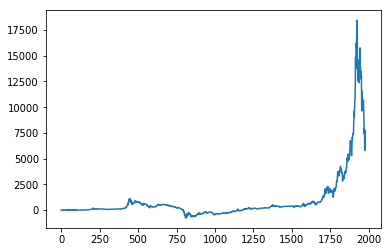

In [10]:
# there is clearly an increasing trend for the price of bitcoin
# checking for seasonality
X = btc_ts.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    value = X[i] - X[i-days_in_year]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

In [11]:
# checking if certain months have better average prices for the year
btc_ts.index.month
month_avgs = []
for i in range(2012, 2019):
    months = list()
    for j in range(1,13):
        m_y = btc_ts[btc_ts.index.year==i]
        m = m_y[m_y.index.month==j]
        if(len(m.price_usd)!=0):
            avg = sum(m.price_usd)/len(m.price_usd)
            months.append(avg)
        else:
            months.append(0)
    month_avgs.append({'Year': i, 'January': months[0], 'February': months[1], 'March': months[2],
                      'April': months[3], 'May': months[4], 'June': months[5], 'July': months[6],
                      'August': months[7], 'September': months[8], 'October': months[9], 
                      'November': months[10], 'December': months[11]})

In [12]:
month_avgs = pd.DataFrame(month_avgs)

In [13]:
month_avgs.drop('Year', axis=1).rank(axis=1)

,April,August,December,February,January,July,June,March,May,November,October,September
0,2.0,8.0,12.0,4.0,6.0,7.0,5.0,1.0,3.0,9.0,11.0,10.0
1,9.0,5.0,12.0,2.0,1.0,4.0,6.0,3.0,7.0,11.0,10.0,8.0
2,5.0,7.0,1.0,11.0,12.0,10.0,9.0,8.0,6.0,3.0,2.0,4.0
3,3.0,7.0,12.0,1.0,6.0,10.0,5.0,9.0,4.0,11.0,8.0,2.0
4,4.0,6.0,12.0,1.0,2.0,10.0,8.0,3.0,5.0,11.0,9.0,7.0
5,4.0,8.0,12.0,2.0,1.0,6.0,7.0,3.0,5.0,11.0,10.0,9.0
6,5.5,5.5,5.5,11.0,12.0,5.5,5.5,5.5,5.5,5.5,5.5,5.5


Months that are later on in the year, such as October/November/December, seem to have higher rank. Although this is likely just due to the increasing trend of cryptocurrency.

In [14]:
month_avgs

,April,August,December,February,January,July,June,March,May,November,October,September,Year
0,4.965896,10.873603,13.135257,5.253617,6.210285,7.775188,5.961872,4.948944,5.042166,11.302019,11.580728,11.400267,2012
1,125.647351,103.386922,791.966258,25.741707,15.311842,85.356419,105.074970,56.956316,117.089728,524.572121,152.340199,124.629855,2013
2,463.320172,536.095398,343.271350,665.321186,821.757334,617.308501,614.445771,597.555200,483.792634,366.008265,364.137785,445.736664,2014
3,235.054794,252.569366,422.163076,233.167626,251.840768,279.640755,237.378826,268.402124,236.779634,347.978013,264.736040,233.892409,2015
4,433.844826,579.044451,821.156849,401.935362,411.403763,661.299670,639.400484,414.765630,460.487036,724.210465,640.967599,604.362367,2016
5,1212.385282,3836.256386,14904.144062,1059.535756,909.061716,2495.321295,2607.779323,1127.333906,1882.554626,7753.708621,5297.857584,4089.788818,2017
6,0.000000,0.000000,0.000000,8225.542987,12854.472549,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018


In [31]:
# finding acf and pacf
from statsmodels.tsa.stattools import acf, pacf

In [25]:
btc_ts[btc_ts.price_usd.isnull()].index

DatetimeIndex(['2011-09-30', '2011-10-01', '2011-10-02', '2011-10-15',
               '2011-10-16', '2011-10-18', '2011-10-19', '2011-10-22',
               '2011-10-23', '2011-10-27', '2011-11-02', '2011-11-03',
               '2011-11-07', '2011-11-23', '2011-11-27', '2011-12-04',
               '2011-12-09', '2011-12-17'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [32]:
btc_cut = btc_ts['2011-12-18':]
acf(btc_cut)

array([ 1.        ,  0.99591064,  0.99133598,  0.98678896,  0.98245787,
        0.9786214 ,  0.97449344,  0.96955738,  0.96462092,  0.95947675,
        0.9535676 ,  0.94667102,  0.93966995,  0.93245733,  0.92539301,
        0.91875301,  0.91237153,  0.90611936,  0.90000182,  0.89363849,
        0.88668068,  0.87846653,  0.86981631,  0.86167209,  0.85357551,
        0.846313  ,  0.83807389,  0.82840703,  0.81901942,  0.80913957,
        0.79957103,  0.79015591,  0.78085395,  0.7714066 ,  0.76155184,
        0.75115982,  0.7408503 ,  0.7312259 ,  0.72235817,  0.71315894,
        0.70399192])

In [33]:
pacf(btc_cut)

array([ 1.        ,  0.99635405, -0.06900577,  0.00574465,  0.02654105,
        0.06215883, -0.05122343, -0.10762037,  0.01496117, -0.03094626,
       -0.11883558, -0.14369584,  0.00551931, -0.03394938, -0.00642489,
        0.04919304,  0.06343766,  0.03920769,  0.02656327, -0.00215751,
       -0.05549648, -0.17555174, -0.0668602 ,  0.05765211, -0.05050667,
        0.07607858, -0.15081356, -0.17087642,  0.06025765, -0.06745299,
        0.08065902,  0.04795403,  0.08183798, -0.00333096, -0.09796545,
       -0.09984649,  0.04421822,  0.10933277,  0.1002542 , -0.02732057,
        0.00861068])

In [ ]:
# looking at dips in bitcoin price
